In [5]:
num_eps = [6,22,23,14,26,26,24,24,23]
episodes = []
epnames = []
for season in range(1,10):
    with open("s0" + str(season), "w+") as sfile:
        for ep in range(1,num_eps[season-1]+1):
            if ep < 10:
                ep_str = "s0" + str(season) + "e0" + str(ep)
            else:
                ep_str = "s0" + str(season) + "e" + str(ep)
            if (not (season == 6 and (ep == 5 or ep == 18))):
                with open(ep_str, "r") as file:
                    line = file.readline()
                    sfile.write(line)
                    episodes.append(line)
                    epnames.append(ep_str)
        

In [6]:
for season in range(1,10):
    with open("nots0" + str(season), "w+") as file:
        for oseason in range(1,10):
            if (not oseason == season):
                with open("s0" + str(oseason), "r") as ofile:
                    line = ofile.readline()
                    file.write(line)

In [7]:
with open("allep", "w+") as file:
    for episode in episodes:
        file.write(episode)
        file.write("\n")

In [8]:
#mindy
mindy = ["s01e06", "s02e01", "s02e18", "s03e06", "s04e10", "s04e15", "s05e09", "s05e16", "s05e19", "s06e4", "s06e13", "s06e16", "s06e22", "s07e05", "s07e11", "s07e21", "s08e10", "s08e17"] 

#paul
paul = ["s01e03", "s02e07", "s02e14", "s02e17", "s03e03", "s03e18", "s03e24", "s04e7", "s04e18", "s05e14", "s05e28", "s06e01", "s07e04", "s07e25", "s08e02", "s09e17"]

#greg
greg = ["s01e01", "s05e05", "s02e05", "s02e11", "s02e21", "s03e01", "s03e23", "s04e01", "s05e4", "s07e22", "s09e01", "s09e24"]

#Jennifer
jennifer = ["s02e09", "s02e20", "s03e04", "s03e10", "s03e23", "s04e03", "s04e14", "s05e12", "s05e28", "s06e03", "s06e15"]


In [9]:
mindyeps = ""
with open("mindy", "w+") as mfile:
    with open("notmindy", "w+") as nfile:
        for i in range(0,len(epnames)):
            if (epnames[i] in mindy):
                mindyeps = mindyeps + episodes[i]
                mfile.write(episodes[i])
            else:
                nfile.write(episodes[i])

In [10]:
pauleps = ""
with open("paul", "w+") as pfile:
    with open("notpaul", "w+") as nfile:
        for i in range(0,len(epnames)):
            if (epnames[i] in paul):
                pauleps = pauleps + episodes[i]
                pfile.write(episodes[i])
            else:
                nfile.write(episodes[i])

In [11]:
gregeps = ""
with open("greg", "w+") as gfile:
    with open("notgreg", "w+") as nfile:
        for i in range(0,len(epnames)):
            if (epnames[i] in greg):
                gregeps = gregeps + episodes[i]
                gfile.write(episodes[i])
            else:
                nfile.write(episodes[i])

In [12]:
jeneps = ""
with open("jennifer", "w+") as jfile:
    with open("notjennifer", "w+") as nfile:
        for i in range(0,len(epnames)):
            if (epnames[i] in jennifer):
                jeneps = jeneps + episodes[i]
                jfile.write(episodes[i])
            else:
                nfile.write(episodes[i])

In [13]:
import spacy

In [20]:
sp = spacy.load('en_core_web_sm')

In [21]:
sentence2 = sp("Manchester United isn't looking to sign any forward. Bla.")

In [22]:
for word in sentence2:  
    print(word.text)

Manchester
United
is
n't
looking
to
sign
any
forward
.
Bla
.


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from html import unescape

In [57]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([mindyeps, pauleps, gregeps, jeneps])
df = pd.DataFrame(X.toarray())

In [53]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(episodes)
df = pd.DataFrame(X.toarray())

In [68]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(episodes)
df = pd.DataFrame(X.toarray())

In [69]:
df = df.div(df.sum(axis=1), axis=0)

In [76]:
df.to_csv("bow.tsv", sep='\t', header=vectorizer.get_feature_names(), index=False)

In [70]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(df)
X_transformed.shape

(186, 2)

In [71]:
dft = pd.DataFrame(X_transformed)
dft.head()

,0,1
0,0.019062,-0.029669
1,-0.036407,-0.029581
2,0.039194,0.008985
3,-0.010578,0.039726
4,-0.005223,-0.046532


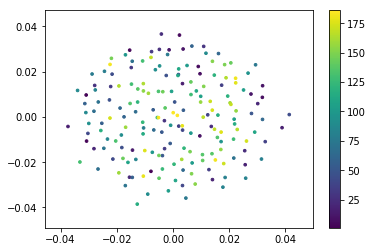

In [79]:
from matplotlib import pyplot as plt
f1 = dft[0].values
f2 = dft[1].values
c = list(range(1,187))
plt.scatter(f1, f2, c=c, s=7)
plt.colorbar()

In [72]:
from scipy.spatial.distance import pdist, squareform
distances = pdist(dft.values, metric='euclidean')
dist_matrix = squareform(distances)
dMatrix = pd.DataFrame(dist_matrix)

In [67]:
#dMatrix.to_csv("writerdist.tsv", sep=',', header=["mindy", "paul", "greg","jenn"], index=False)
dMatrix.to_csv("idfdist.tsv", sep=',', header=epnames, index=False)

ValueError: Writing 186 cols but got 4 aliases